In [2]:
import pandas as pd
import nltk
import time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
import re
import numpy as np
from collections import Counter
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import Word2Vec

In [ ]:
#!pip install googletrans==3.1.0a0

In [3]:
!pip install scikit-learn matplotlib wordcloud pandas

In [4]:
def most_frequent_words(df, all_words, amount):

  # Remove punctuation and split into words
  words = re.findall(r'\b\w+\b', all_words)

  # Get the 5 most common words
  most_common_words = Counter(words).most_common(5)
  print("5 most frequent words:")
  for word, freq in most_common_words:
      print(f"{word}: {freq}")

def count_of_words_apear_once(df, all_words):

  # Combine all text into a single string
  words = re.findall(r'\b\w+\b', all_words)
  # Count word frequencies
  word_freq = Counter(words)

  # Count words that appear only once
  unique_words = sum(1 for word, freq in word_freq.items() if freq == 1)
  print(f"Number of words that only appear once: {unique_words}")

def avg_words_per_message(df, column):
  df['word_count'] = df[column].apply(lambda x: len(x.split()))
  average_words = df['word_count'].mean()
  print(f"Average number of words per message: {average_words:.2f}")

def total_num_of_data(df):
  total_messages = len(df)
  print(f"Total number of messages: {total_messages}")

  # Function to print word statistics
def print_word_statistics(text):
    str = " ".join(text)
    words = word_tokenize(str)
    total_words = len(words)
    unique_words = len(set(words))
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(10)

    print(f"Total words: {total_words}")
    print(f"Unique words: {unique_words}")

In [5]:
def data_cleaning(df, column):
  # Handle missing values
  df = df.dropna()  # Drop rows with any missing values

  # Convert text to lowercase
  df[column] = df[column].str.lower()

  # Remove punctuation
  #df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

  # Remove special characters
  #df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Zא-ת0-9\s]', '', x))
  df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s.]', '', x))
  # Step 6: Remove stop words
  df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

  # Use the sub() method to replace URLs with the specified replacement text
  df[column] =df[column].apply(lambda x : re.sub(r'https\S*', '', x))

  # Replace empty strings with NaN
  df[column] = df[column].replace('', pd.NA)

  # Drop rows with NaN values in the specified column
  df = df.dropna(subset=[column])
  # Display the first few rows of the cleaned DataFrame
  return df


In [ ]:
"""
def translate_columns(filtered_df, columns_to_translate, chunk_size, src='he', dest='en'):
    # Initialize the Translator object
    translator = Translator()

    # Function to translate text
    def translate_text(text):
        if pd.isna(text):
            return None  # Return None if text is NaN
        try:
            # Split text into chunks with a word count greater than 600
            chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
            translated_chunks = []
            # Translate each chunk
            for chunk in chunks:
                result = translator.translate(chunk, src=src, dest=dest)
                translated_chunks.append(result.text)
            # Concatenate translated chunks
            translated_text = ' '.join(translated_chunks)
            return translated_text
        except Exception as e:
            #print(f"Error translating text: '{text}'. Error: {e}")
            return "Translation failed"

    # Translate each specified column
    for column in columns_to_translate:
        # Apply translation to each row in the column
        filtered_df[f'{column}_en'] = filtered_df[column].apply(translate_text)

    return filtered_df
"""

'\ndef translate_columns(filtered_df, columns_to_translate, chunk_size, src=\'he\', dest=\'en\'):\n    # Initialize the Translator object\n    translator = Translator()\n\n    # Function to translate text\n    def translate_text(text):\n        if pd.isna(text):\n            return None  # Return None if text is NaN\n        try:\n            # Split text into chunks with a word count greater than 600\n            chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]\n            translated_chunks = []\n            # Translate each chunk\n            for chunk in chunks:\n                result = translator.translate(chunk, src=src, dest=dest)\n                translated_chunks.append(result.text)\n            # Concatenate translated chunks\n            translated_text = \' \'.join(translated_chunks)\n            return translated_text\n        except Exception as e:\n            #print(f"Error translating text: \'{text}\'. Error: {e}")\n            return "Translat

In [6]:
# Download necessary NLTK data
nltk.download('punkt')
#nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/extracted_texts_en.csv'

df = pd.read_csv(drive_path)
df.shape
pd.set_option('display.max_colwidth', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = df.dropna(subset=['Text'])
df.head(10)

Text
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             \nAAA 9241/09\n\nSheleg Lavan\n(White Snow) 1986 Ltd\n\nv.\n\n1.AshkelonMunicipality\n2.Ram K.R.M. Ltd\n3.Tnufa Personnel Services Ltd\n4.J.J.A. Maintenance and Services Ltd.\n\nThe Supreme Court\nSitting as a Court of Appeals\nfor Administrative Affairs\n[8 July 2010]\n\nBefore Justices E.E. Levy, E. Arbel andN. Hendel\n\nAppeal of an Administrative Affairs decision of the Beersheba District\nCourt dated 8 November2009 inAA 357/09, issued by the Honorable President J. Elon.\n\nFacts:The respondent,\ntheAshkelonmunicipal government, issued a\ntender for the provision of cleaning services. The tender documents set a\nminimum bid price in accordance with the exact amount of the wages for cleaning\nworkers as determined in a government circular establishing a national standard\nfor such wages. Respondent 2 submitted the lowest and ultimately winning bid.\nAs part of the tender process, respondent 2 explained its ability to pay the minimum\nwage while also covering expenses and earning a profit by noting its\nexpectations that a percentage of its workers at any given time would not have acquired\nenough seniority to entitle them to pension and other benefits; thus, savings\nwith respect to the compensation of its workers would allow the respondent to\ncover its expenses and earn a minimal profit. The lower court upheld the award\nof the tender to the respondent, noting that the tender itself had included no\nrequirement regarding the seniority of workers and that the bid was therefore\nentirely acceptable. The appellant, which had tendered unsuccessfully on the\nbasis of a higher salary cost, appealed.\nHeld: The appeal\nagainst the lower court’s decision was allowed in full. There is no ground for\ndistinguishing between the rules governing this matter in a national government\ncontext and the rules that apply to local government; recently enacted\nregulations and government directives make clear that the upholding of workers’\nrights is of paramount importance and will be a relevant consideration in\ngovernment tender decisions, because of the administrative authorities’\nobligations vis-à-vis the public. Although it is impossible to predict or to prevent\nevery possible violationof workers’\nrights through the tender process, a government authority issuing a tender to\ncontract for services with an external party must nevertheless provide as much forward-looking\nprotection for the contractors’ workers as is possible. Thus, when a bidder has\nexpressly stated a plan to dismiss workers after particularly short periods of\ntime in order to minimize the burden of social benefit payments, the bid cannot\nbe accepted.\nLegislation cited:\nSeverance\nPay Law, s. 3.\nLocal\nCouncils Order (a), 5711-1951, s. 192.\nLocal\nCouncils Order (Regional Councils), 5718-1958, s. 89.\nMandatory\nTenders Law, 5752-1992.\nMunicipalities\nOrdinance [New Version], 5724-1964, s. 197.\nMunicipalities\nRegulations (Tenders), 5748-1987, reg. 11.\n\nSupreme Court Case Cited\n[1]......HCJ 10245/

In [8]:
origin_df = df.copy()
df = data_cleaning(df , 'Text')
df.head(10)

<ipython-input-5-17d169defc24>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.lower()
<ipython-input-5-17d169defc24>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s.]', '', x))
<ipython-input-5-17d169defc24>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Text
0                                                                                                                                                                                                                                                                                       aaa 924109 sheleg lavan white snow 1986 ltd v. 1.ashkelonmunicipality 2.ram k.r.m. ltd 3.tnufa personnel services ltd 4.j.j.a. maintenance services ltd. supreme court sitting court appeals administrative affairs 8 july 2010 justices e.e. levy e. arbel andn. hendel appeal administrative affairs decision beersheba district court dated 8 november2009 inaa 35709 issued honorable president j. elon. factsthe respondent theashkelonmunicipal government issued tender provision cleaning services. tender documents set minimum bid price accordance exact amount wages cleaning workers determined government circular establishing national standard wages. respondent 2 submitted lowest ultimately winning bid. part tender process respondent 2 explained ability pay minimum wage also covering expenses earning profit noting expectations percentage workers given time would acquired enough seniority entitle pension benefits thus savings respect compensation workers would allow respondent cover expenses earn minimal profit. lower court upheld award tender respondent noting tender included requirement regarding seniority workers bid therefore entirely acceptable. appellant tendered unsuccessfully basis higher salary cost appealed. held appeal lower courts decision allowed full. ground distinguishing rules governing matter national government context rules apply local government recently enacted regulations government directives make clear upholding workers rights paramount importance relevant consideration government tender decisions administrative authorities obligations visàvis public. although impossible predict prevent every possible violationof workers rights tender process government authority issuing tender contract services external party must nevertheless provide much forwardlooking protection contractors workers possible. thus bidder expressly stated plan dismiss workers particularly short periods time order minimize burden social benefit payments bid cannot accepted. legislation cited severance pay law s. 3. local councils order 57111951 s. 192. local councils order regional councils 57181958 s. 89. mandatory tenders law 57521992. municipalities ordinance new version 57241964 s. 197. municipalities regulations tenders 57481987 reg. 11. supreme court case cited 1......hcj 1024507israel national organization guarding security companies v. minister justice2007 unreported. district court cases cited 2ap tamodiin ezrachi ltd v. association dan region municipalities2008. 3ap jerusalem 107706koach otzma ltd. v. jewish national fundkeren kayemeth leisrael2007. 4ap nazareth 11708reshef security 1993 ltd v. afula municipality2008. labor court cases cited 5nlc 45443kara v. ofir1995 unreported. 6laba 12203waxman v. itc 24 around clock2007 yet reported. 7laba 42006kogen v. kfir electronic security protection ltd2007 yet reported. legislation cited severance pay law s. 3a. local councils order 57111951 s. 192. local councils regional councilsorder 57181958 s. 89. mandatory tenders law 57521992. municipalities ordinance new version 57241964 s. 197. municipalities tendersregulations 57481987. appellant r. barak r. garber. respondent 1 y. avishur. respondent 2 g. tavur. respondent 3 a. shur a. lazar. respondent 4 a. kaminetzky. judgment justice e.e. levy factual background 1.in may 2009 respondent 1 theashkelonmunicipality published tender provision cleaning services offices citys educational institutions. tender covered period two years possibility extension additional period. appellant respondents among submitted bids tender respondent 2 ram k.r.m. ltd awarded contract. section 2 b3 tender conditions provided follows bids based tender documentsincludingthe tender participants 

In [ ]:
"""
from googletrans import Translator

columns_to_translate = ['Text']
df = translate_columns(df, columns_to_translate, 600, src='he', dest='en')
df.to_csv('/content/translated.csv', index=False)
"""

"\nfrom googletrans import Translator\n\ncolumns_to_translate = ['Text']\ndf = translate_columns(df, columns_to_translate, 600, src='he', dest='en')\ndf.to_csv('/content/translated.csv', index=False)\n"

# SpaCy Tokenizer

In [9]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import spacy

stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

# Remove Stop Words And NER

In [10]:

def tokenize_remove_ner_and_stop_words(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc]
    stop_words_found = set(token for token in tokens if token in stop_words)
    entities_found = set()
    for ent in doc.ents:
        # Split entity text by spaces and commas
        entity_words = re.split(r'[,\s]+', ent.text.lower())
        entities_found.update(entity_words)

    filtered_tokens = [token for token in tokens if token not in stop_words and token not in entities_found]

    return {
        'original_text': text,
        'tokens': tokens,
        'stop_words_found': stop_words_found,
        'entities_found': entities_found,
        'filtered_text': ' '.join(filtered_tokens)
    }
results = df['Text'].apply(tokenize_remove_ner_and_stop_words)
data_df = pd.DataFrame(results.tolist())



In [ ]:
data_df.to_csv("/content/data_df.csv")

In [ ]:
# Display results for verification
for result in results.head():
    print("Original Text:\n", result['original_text'])
    print("tokens:\n", result['tokens'])
    print("Stop Words Found:\n", result['stop_words_found'])
    print("Entities Found:\n", result['entities_found'])
    print("Filtered Text:\n", result['filtered_text'])
    print("\n")

Original Text:
 aaa 924109 sheleg lavan white snow 1986 ltd v. 1.ashkelonmunicipality 2.ram k.r.m. ltd 3.tnufa personnel services ltd 4.j.j.a. maintenance services ltd. supreme court sitting court appeals administrative affairs 8 july 2010 justices e.e. levy e. arbel andn. hendel appeal administrative affairs decision beersheba district court dated 8 november2009 inaa 35709 issued honorable president j. elon. factsthe respondent theashkelonmunicipal government issued tender provision cleaning services. tender documents set minimum bid price accordance exact amount wages cleaning workers determined government circular establishing national standard wages. respondent 2 submitted lowest ultimately winning bid. part tender process respondent 2 explained ability pay minimum wage also covering expenses earning profit noting expectations percentage workers given time would acquired enough seniority entitle pension benefits thus savings respect compensation workers would allow respondent cover

In [ ]:
all_words = ' '.join(data_df['filtered_text']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(data_df['filtered_text'])

# Average number of words per message
avg_words_per_message(data_df, 'filtered_text')
# 5 most frequent words
most_frequent_words(data_df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(data_df, all_words)

---------Before Text Processing-------
Total number of messages: 153
Total words: 349368
Unique words: 25639
Average number of words per message: 2282.92
5 most frequent words:
law: 3830
case: 1589
also: 1472
would: 1354
respondent: 1344
Number of words that only appear once: 11504


# Nltk - Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
x = all_words.split()
start_time = time.time()

for w in x:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

4.815795660018921

In [ ]:
print('15 examples of tokens where the token text differs from its lemma')
count = 0
for w in x:
    if w != lemmatizer.lemmatize(w, pos='n'):
        print(w +':' + lemmatizer.lemmatize(w, pos='n'))
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
appeals:appeal
affairs:affair
justices:justice
affairs:affair
documents:document
wages:wage
workers:worker
wages:wage
expenses:expense
expectations:expectation
workers:worker
benefits:benefit
savings:saving
workers:worker
expenses:expense


# Finding The Most Frequent Words Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Vectorize the filtered text
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(data_df['filtered_text']).toarray()

# Get feature names and average scores
features = vectorizer.get_feature_names_out()
avg_tfidf_scores = np.mean(X_tfidf, axis=0)

# Create DataFrame for TF-IDF scores
tfidf_scores_df = pd.DataFrame({
    'Feature': features,
    'TFIDF_Score': avg_tfidf_scores
})

tfidf_scores_df = tfidf_scores_df.sort_values(by='TFIDF_Score', ascending=False)
top_tfidf_scores_df = tfidf_scores_df.head(20)

# Prepare data for bar chart
words, scores = top_tfidf_scores_df['Feature'], top_tfidf_scores_df['TFIDF_Score']


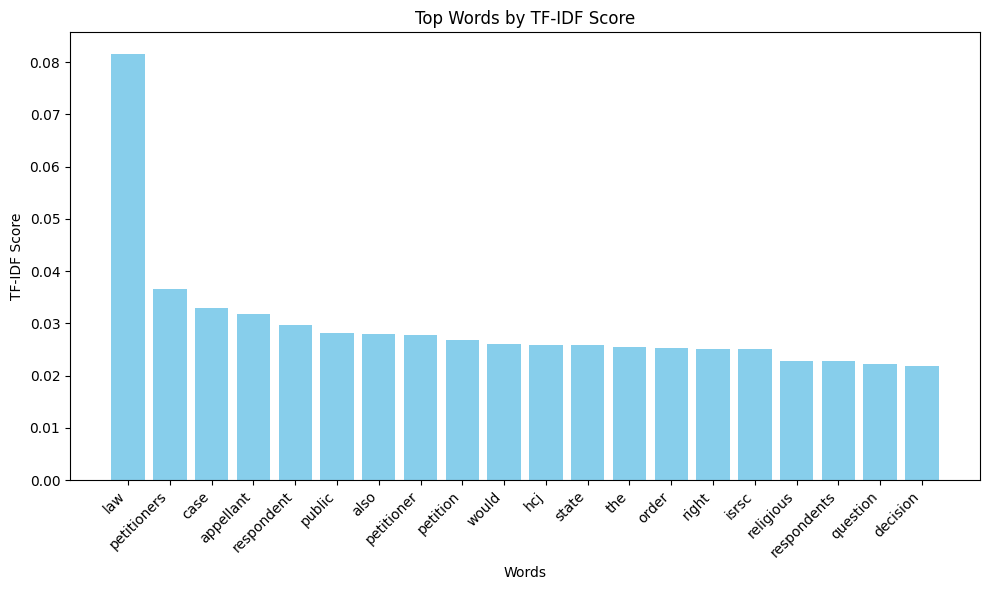

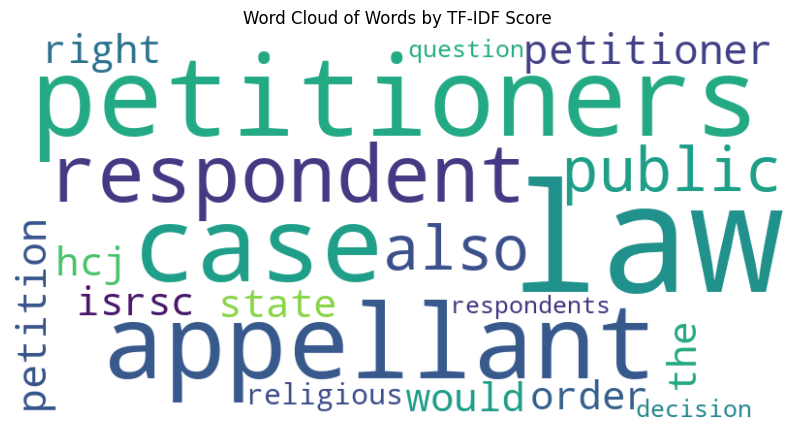

In [ ]:
# Plot Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(words, scores, color='skyblue')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('Top Words by TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a dictionary with words and their scores
word_freq = dict(zip(words, scores))

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Words by TF-IDF Score')
plt.show()

# Finding The Most Frequent Words Using WORD2VEC

In [ ]:
from gensim.models import Word2Vec
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

def most_frequent_word2vec(data):
  tokenized_texts = [simple_preprocess(text) for text in data]

  # Train a Word2Vec model
  model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

  # Get words and their vectors
  words = list(model.wv.index_to_key)
  word_vectors = model.wv[words]

  # Compute importance score (mean vector norm)
  importance_scores = np.linalg.norm(word_vectors, axis=1)
  word_scores = dict(zip(words, importance_scores))
  return (importance_scores,  word_scores)

In [ ]:
importance_scores, word_scores = most_frequent_word2vec(data_df['filtered_text'])

# Create DataFrame for Word2Vec scores
word2vec_scores_df = pd.DataFrame(list(word_scores.items()), columns=['Feature', 'Word2Vec_Score'])
word2vec_scores_df = word2vec_scores_df.sort_values(by='Word2Vec_Score', ascending=False)
top_word2vec_scores_df = word2vec_scores_df.head(20)

In [ ]:
top_word2vec_scores_df

Feature  Word2Vec_Score
30        isrsc       15.186854
17          hcj       13.144420
101    minister        9.482334
35       appeal        8.935453
199     sitting        8.691459
22     petition        8.579254
50        basic        8.525957
133       human        8.493426
69      freedom        8.325966
23      whether        8.237135
100   president        8.153260
26     judgment        8.152138
368         ltd        8.138110
76         high        8.080492
129       cited        7.983928
11     question        7.820478
0           law        7.808500
261          ca        7.754009
4    respondent        7.720601
106    referred        7.710693

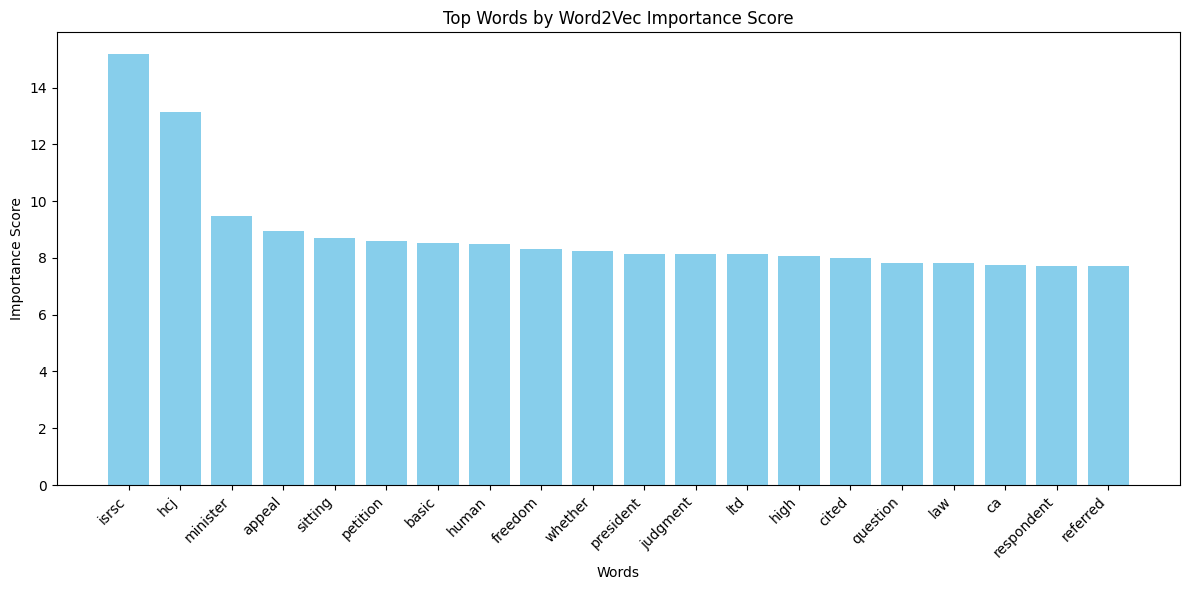

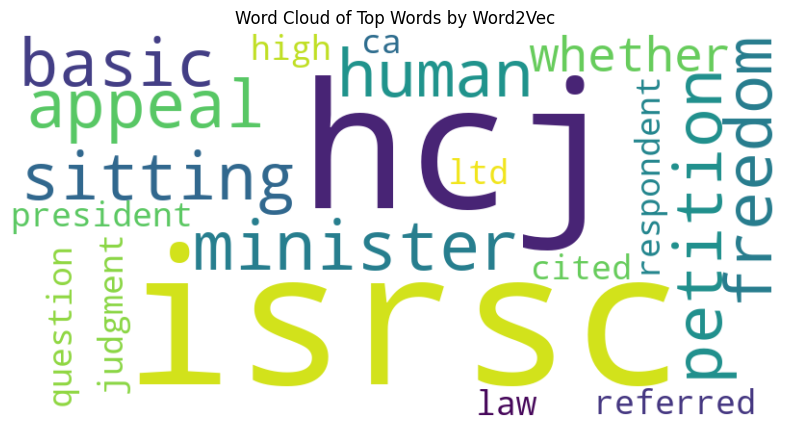

In [ ]:
# Plot Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(top_word2vec_scores_df['Feature'], top_word2vec_scores_df['Word2Vec_Score'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Importance Score')
plt.title('Top Words by Word2Vec Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate Word Cloud
words, scores = top_word2vec_scores_df['Feature'], top_word2vec_scores_df['Word2Vec_Score']
word_freq = dict(zip(words, scores))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words by Word2Vec')
plt.show()


# Finding The Most Frequent Words Using - AUTOENCODER

In [ ]:
pip install --upgrade tensorflow


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Note: This is the correct import

# Vectorize the filtered text
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(data_df['filtered_text']).toarray()

# Calculate the maximum length of X
max_len = X.shape[1]
print(f"Maximum length of X: {max_len}")

input_dim = X.shape[1]
encoding_dim = 300  # Increase encoding dimension

# Define the autoencoder with more layers
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)  # Add Dropout
encoded = Dense(encoding_dim // 2, activation='relu')(encoded)
encoded = Dropout(0.2)(encoded)  # Add Dropout
encoded = Dense(encoding_dim // 4, activation='relu')(encoded)

decoded = Dense(encoding_dim // 2, activation='relu')(encoded)
decoded = Dense(encoding_dim, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')
autoencoder.fit(X, X, epochs=150, batch_size=256, shuffle=True, validation_split=0.2, callbacks=[lr_scheduler])

Maximum length of X: 10000
Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.6931 - val_loss: 0.6881 - learning_rate: 0.0100
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6881 - val_loss: 0.6769 - learning_rate: 0.0100
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step - loss: 0.6769 - val_loss: 0.5712 - learning_rate: 0.0100
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.5683 - val_loss: 0.0747 - learning_rate: 0.0100
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - loss: 0.0742 - val_loss: 0.0342 - learning_rate: 0.0100
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - loss: 0.0308 - val_loss: 0.1103 - learning_rate: 0.0100
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.0969 - val_loss: 0.1798 - learning_rate: 0.0100
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step - loss: 0.1557 - val_loss: 0.1861 - learning_rate: 0.0100
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 0.1575 - val_loss: 0.1882 - learning_rate: 0.010

In [ ]:
# Calculate reconstruction error
reconstructed_texts = autoencoder.predict(X)
reconstruction_error = np.mean(np.square(X - reconstructed_texts), axis=1)

print(f"Reconstruction errors: {reconstruction_error[:10]}")  # Print first 10 errors for inspection

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Reconstruction errors: [9.30042622e-05 9.28295435e-05 9.07110304e-05 8.95256929e-05
 9.05202976e-05 9.50344440e-05 8.80431780e-05 9.39912911e-05
 8.53647007e-05 9.52544244e-05]


In [ ]:

# Compute the mean reconstruction error for each feature (word)
reconstruction_errors = np.mean(np.square(X - reconstructed_texts), axis=0)

# Create a DataFrame to store the feature names and their corresponding errors
features = vectorizer.get_feature_names_out()
autoencoder_scores_df = pd.DataFrame({
    'Feature': features,
    'Autoencoder_Score': reconstruction_errors
})

# Sort the features by their reconstruction errors in descending order
autoencoder_scores_df = autoencoder_scores_df.sort_values(by='Autoencoder_Score', ascending=False)

# Display the top 20 most important words
top_autoencoder_scores_df = autoencoder_scores_df.head(20)

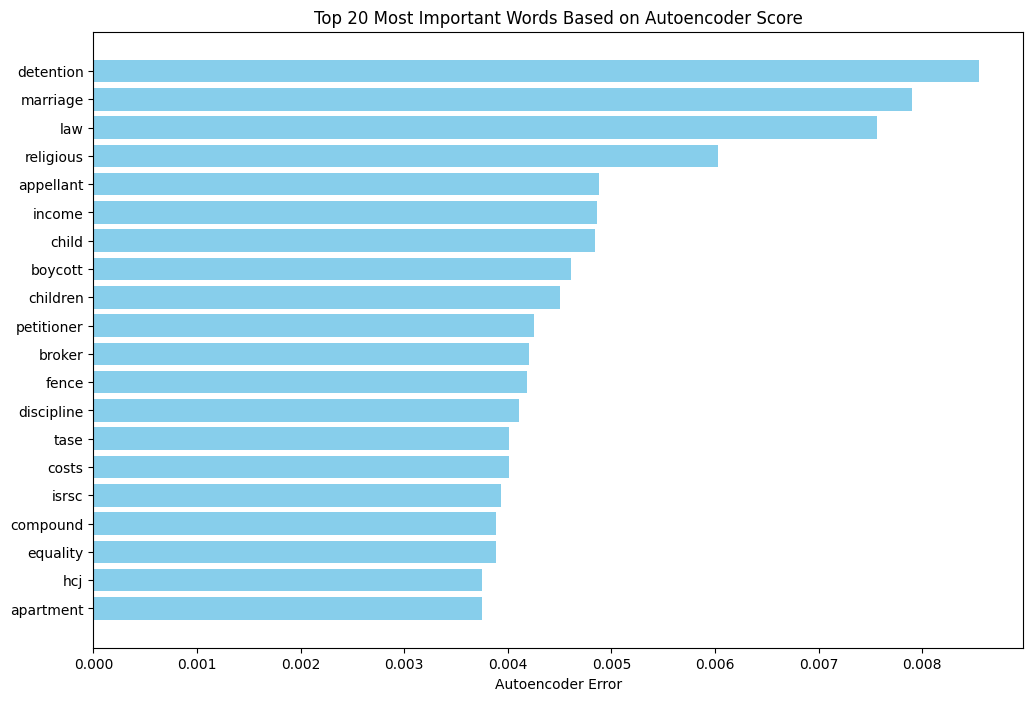

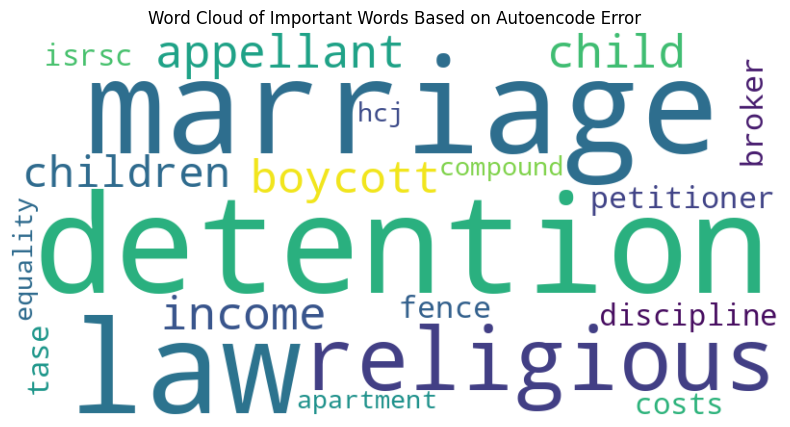

In [ ]:

# Plot the top 20 most important words
plt.figure(figsize=(12, 8))
plt.barh(top_autoencoder_scores_df['Feature'], top_autoencoder_scores_df['Autoencoder_Score'], color='skyblue')
plt.xlabel('Autoencoder Error')
plt.title('Top 20 Most Important Words Based on Autoencoder Score')
plt.gca().invert_yaxis()
plt.show()


# Generate a word cloud based on reconstruction errors
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    top_autoencoder_scores_df.set_index('Feature')['Autoencoder_Score']
)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Important Words Based on Autoencode Error')
plt.show()


# Comparing The Results Between TF-IDS, Word2Vec, AutoEncoder

In [ ]:
# Merge TF-IDF, Word2Vec, and Autoencoder scores
combined_scores_df = pd.merge(tfidf_scores_df, word2vec_scores_df, on='Feature', how='outer')
combined_scores_df = pd.merge(combined_scores_df, autoencoder_scores_df, on='Feature', how='outer')

# Fill NaN values with 0 or some other appropriate value
combined_scores_df = combined_scores_df.fillna(0)
combined_scores_df

Feature  TFIDF_Score  Word2Vec_Score  Autoencoder_Score
0              law     0.081630        7.808500           0.007565
1      petitioners     0.036608        6.506894           0.003564
2             case     0.032956        6.168710           0.000999
3        appellant     0.031853        6.802681           0.004878
4       respondent     0.029701        7.720601           0.002335
...            ...          ...             ...                ...
20146        blown     0.000000        0.053616           0.000000
20147       laurel     0.000000        0.053524           0.000000
20148        shewn     0.000000        0.053411           0.000000
20149       lapsed     0.000000        0.053162           0.000000
20150       traced     0.000000        0.051822           0.000000

[20151 rows x 4 columns]

# NER Model

In [ ]:
def remove_punctuation(text):
    # Use regex to substitute all punctuation with an empty string
    return re.sub(r'[^\w\s]', '', text)

def clean_text(text):
  cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  cleaned_text = remove_punctuation(cleaned_text)
  return cleaned_text

In [ ]:
from transformers import pipeline

# Load the NER pipeline with a pre-trained model
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import re

def perform_NER(text, ner_pipeline):
  #text = text.lower()
  results = ner_pipeline(text)
  return results

def extract_from_NER():
  names = []  # Create a new, empty list to store the results.
  current_string = ""  # This will store the concatenated strings.
  new_strings = []
  for string in I_PER_words:
      if string.startswith("##"):
          # If the string starts with "##", concatenate it with the current string.
          current_string += string[2:]  # Append the part of the string after "##".
      else:
          # If the string does not start with "##", first check if there's something to add to the list.
          if current_string:
              names.append(current_string)  # Append the concatenated string to the list.
          current_string = string  # Start a new current string.

  # Don't forget to append the last element if the list ends with a string that does not start with "##".
  if names:
      new_strings.append(current_string)

  #print(names)
  return names

def get_lines_containing(text, search_strings):
    text = text.lower()
    search_strings = [s.lower() for s in search_strings]
    # Split the text into lines
    lines = text.splitlines()
    # Filter lines that contain the search string
    matching_lines = [line for line in lines if any(search_string in line for search_string in search_strings)]

    return matching_lines

def check_search_strings(text, search_strings):
    # Split the text into lines
    found_names = []
    lines = text.splitlines()

    # Create a dictionary to store results
    search_results = {search_string: {"found": False, "lines": []} for search_string in search_strings}

    # Check each line for each search string
    for line in lines:
        for search_string in search_strings:
            if search_string in line:
                search_results[search_string]["found"] = True
                search_results[search_string]["lines"].append(line)

    # Print results
    for search_string, result in search_results.items():
        if result["found"]:
            found_names.append(search_string)
            print(f"'{search_string}' found:")
            for line in result["lines"]:
                print(f"  - {line}")
        else:
            print(f"'{search_string}' not found.")
    return found_names

def custom_split(text):
    # Match lines with colons that should not be split
    pattern = re.compile(r'([^\n;]*:[^\n;]*)([\n;])')

    # Replace newlines and semicolons that follow lines ending with a colon with a unique marker
    text = re.sub(pattern, r'\1|||', text)

    # Replace semicolons and newlines with a unique marker
    text = text.replace('\n', '|||').replace(';', '|||')

    # Split by the unique marker
    parts = text.split('|||')

    # Remove empty strings and strip whitespace
    parts = [part.strip() for part in parts if part.strip()]

    return parts

def split_text_into_chunks(text, num_chunks=3):
    # Calculate the approximate length of each chunk
    chunk_size = len(text) // num_chunks

    # Create the chunks
    chunks = []
    start = 0

    for i in range(num_chunks):
        # Calculate end position for each chunk
        if i < num_chunks - 1:
            end = start + chunk_size
        else:
            end = len(text)  # For the last chunk, take the rest of the text

        # Append the chunk to the list
        chunks.append(text[start:end])
        start = end

    return chunks

def replace_keywords(lines_to_replace, keywords):
    """
    Replace all occurrences of keywords in each line of the list.

    Args:
    - lines: List of strings to process.
    - keywords: List of keywords to replace.

    Returns:
    - List of processed lines with keywords replaced.
    """
    for keyword in keywords:
        lines_to_replace = [line.replace(keyword, "") for line in lines_to_replace]
    return [line.strip() for line in lines_to_replace if line.strip()]

In [11]:
texts = origin_df['Text']
texts

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    \nAAA 9241/09\n\nSheleg Lavan\n(White Snow) 1986 Ltd\n\nv.\n\n1.AshkelonMunicipality\n2.Ram K.R.M. Ltd\n3.Tnufa Personnel Services Ltd\n4.J.J.A. Maintenance and Services Ltd.\n\nThe Supreme Court\nSitting as a Court of Appeals\nfor Administrative Affairs\n[8 July 2010]\n\nBefore Justices E.E. Levy, E. Arbel andN. Hendel\n\nAppeal of an Administrative Affairs decision of the Beersheba District\nCourt dated 8 November2009 inAA 357/09, issued by the Honorable President J. Elon.\n\nFacts:The respondent,\ntheAshkelonmunicipal government, issued a\ntender for the provision of cleaning services. The tender documents set a\nminimum bid price in accordance with the exact amount of the wages for cleaning\nworkers as determined in a government circular establishing a national standard\nfor such wages. Respondent 2 submitted the lowest and ultimately winning bid.\nAs part of the tender process, respondent 2 explained its ability to pay the minimum\nwage while also covering expenses and earning a profit by noting its\nexpectations that a percentage of its workers at any given time would not have acquired\nenough seniority to entitle them to pension and other benefits; thus, savings\nwith respect to the compensation of its workers would allow the respondent to\ncover its expenses and earn a minimal profit. The lower court upheld the award\nof the tender to the respondent, noting that the tender itself had included no\nrequirement regarding the seniority of workers and that the bid was therefore\nentirely acceptable. The appellant, which had tendered unsuccessfully on the\nbasis of a higher salary cost, appealed.\nHeld: The appeal\nagainst the lower court’s decision was allowed in full. There is no ground for\ndistinguishing between the rules governing this matter in a national government\ncontext and the rules that apply to local government; recently enacted\nregulations and government directives make clear that the upholding of workers’\nrights is of paramount importance and will be a relevant consideration in\ngovernment tender decisions, because of the administrative authorities’\nobligations vis-à-vis the public. Although it is impossible to predict or to prevent\nevery possible violationof workers’\nrights through the tender process, a government authority issuing a tender to\ncontract for services with an external party must nevertheless provide as much forward-looking\nprotection for the contractors’ workers as is possible. Thus, when a bidder has\nexpressly stated a plan to dismiss workers after particularly short periods of\ntime in order to minimize the burden of social benefit payments, the bid cannot\nbe accepted.\nLegislation cited:\nSeverance\nPay Law, s. 3.\nLocal\nCouncils Order (a), 5711-1951, s. 192.\nLocal\nCouncils Order (Regional Councils), 5718-1958, s. 89.\nMandatory\nTenders Law, 5752-1992.\nMunicipalities\nOrdinance [New Version], 5724-1964, s. 197.\nMunicipal

In [ ]:
data = []
general_keywords = ["the"]
judgements_keywords = ["honorable", "justice", "presidant"]
dates_keywords = ["date of session:", "date of session", "date of sessions", "date of sessions:", "of session", "of session:"]

for text in texts:
  judgments_names = []
  attorney_names = []
  appellant_names = [] #מערערים
  applicant_names = [] #עותרים
  respondent_names = []
  date_of_session = ""

  chunks = split_text_into_chunks(text, 4)
  text = chunks[0]
  # Apply custom split
  lines = custom_split(text)

  for index, line in enumerate(lines):
    if index == 40:
      break
    if "respondent" not in line and len(respondent_names) > 0:
      if date_of_session not in "":
        break

    line = clean_text(line)
    #line = line.lower()
    results = perform_NER(line, ner_pipeline)
    if len(results) == 0:
      continue


    I_PER_words = [obj["word"] for obj in results if obj["entity"] == "I-PER"]
    I_LOC_words = [obj["word"] for obj in results if obj["entity"] == "I-LOC"]
    lines_with_I_PER = get_lines_containing(line, I_PER_words)
    lines_with_I_LOC = get_lines_containing(line, I_LOC_words)
    line = line.lower()

    print(f"\nline number: {index}: {line}")
    print('results', results)
    print('I_PER_words', I_PER_words)
    print('I_LOC_words', I_LOC_words)
    print("lines_with_I_PER", lines_with_I_PER)
    print("lines_with_I_LOC", lines_with_I_LOC)

    if len(lines_with_I_PER) > 0:
      lines_with_I_PER = replace_keywords(lines_with_I_PER, general_keywords)

    if any(keyword in line for keyword in judgements_keywords):
      if(len(lines_with_I_PER) > 0 and len(lines_with_I_PER[0]) < 50):
        lines_with_I_PER_cleaned = replace_keywords(lines_with_I_PER, judgements_keywords)
        judgments_names.extend(lines_with_I_PER_cleaned)

    elif any(keyword in line for keyword in dates_keywords):
      date_of_session = replace_keywords([line], dates_keywords)[0]
      print('date_of_session:', date_of_session)
    elif "attorney" in line:
      attorney_names.extend(lines_with_I_PER)

    elif "appellant" in line:
      if len(lines_with_I_PER) > 0:
        appellant_names.extend(lines_with_I_PER)
      elif len(lines_with_I_LOC) > 0:
        appellant_names.extend(lines_with_I_LOC)

    elif "applicant" in line:
      if len(lines_with_I_PER) > 0:
        applicant_names.extend(lines_with_I_PER)
      elif len(lines_with_I_LOC) > 0:
        applicant_names.extend(lines_with_I_LOC)

    elif "respondent" in line:
      if len(lines_with_I_PER) > 0:
        respondent_names.extend(lines_with_I_PER)
      elif len(lines_with_I_LOC) > 0:
        respondent_names.extend(lines_with_I_LOC)
  data.append({
      'judgments_names': ",".join(judgments_names),
      'attorney_names': ",".join(attorney_names),
      'appellant_names': ",".join(appellant_names),
      'applicant_names': ",".join(applicant_names),
      'respondent_names': ",".join(respondent_names),
      'date_of_session': date_of_session,
      'text': text
      })
  print(judgments_names)
  print(attorney_names)
  print(appellant_names)
  print(applicant_names)
  print(respondent_names)
  print(date_of_session)

Streaming output truncated to the last 5000 lines.
I_LOC_words []
lines_with_I_PER []
lines_with_I_LOC []

line number: 30: aircraft coltdand another v canadian flight equipment ltdthat if the appellant cooperative desired unilaterally to change the agreement
results [{'entity': 'I-ORG', 'score': 0.99872106, 'index': 1, 'word': 'Aircraft', 'start': 0, 'end': 8}, {'entity': 'I-ORG', 'score': 0.9986808, 'index': 2, 'word': 'Co', 'start': 9, 'end': 11}, {'entity': 'I-ORG', 'score': 0.985795, 'index': 3, 'word': '##L', 'start': 11, 'end': 12}, {'entity': 'I-ORG', 'score': 0.9206046, 'index': 4, 'word': '##t', 'start': 12, 'end': 13}, {'entity': 'I-ORG', 'score': 0.8468181, 'index': 5, 'word': '##dan', 'start': 13, 'end': 16}, {'entity': 'I-ORG', 'score': 0.9810782, 'index': 6, 'word': '##d', 'start': 16, 'end': 17}, {'entity': 'I-ORG', 'score': 0.9839294, 'index': 7, 'word': 'Another', 'start': 18, 'end': 25}, {'entity': 'I-ORG', 'score': 0.99941754, 'index': 9, 'word': 'Canadian', 'start'

# Finding Names

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
data_df = pd.DataFrame(data)

# Display the DataFrame
data_df

judgments_names  \
0                                      before s ee levy e arbel andn hendel   
1                           deputy president e rubinstein,h melcer,n hendel   
2    president e hayut,deputy president h melcer,n hendel,u vogelman,i amit   
3                    president e hayut,deputy president h melcer,n sohlberg   
4                      president e hayut,deputy president h melcer,n hendel   
..                                                                      ...   
148                                                                           
149                                                                           
150                                                                           
151                                                                           
152                                                                           

                                     attorney_names appellant_names  \
0                                                                     
1                                                                     
2                                                                     
3                                                                     
4                                                                     
..                                              ...             ...   
148                                                                   
149                                                                   
150  a15851bz shvili v attorneygeneral ofisrael1952                   
151                                                                   
152                                                                   

    applicant_names        respondent_names                date_of_session  \
0                                                                            
1                    respondentyousef ahmad     29thof adar b 5774march 31   
2                                                                            
3                                                                            
4                                            15thof iyar 5778april 30 2018   
..              ...                     ...                            ...   
148                                                                          
149                                                                          
150                                                                          
151                                                                          
152                                                                          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# Finding Judgements Names

In [ ]:
"""
lines_with_string = get_lines_containing(cleaned_text, names)

judgements_lines = []
for line in lines_with_string:
    print(line)
    print('************')
    if line.startswith("President") or line.startswith("Justice") or line.startswith("The Honorable"):
      judgements_lines.append(line)
"""

'\nlines_with_string = get_lines_containing(cleaned_text, names)\n\njudgements_lines = []\nfor line in lines_with_string:\n    print(line)\n    print(\'************\')\n    if line.startswith("President") or line.startswith("Justice") or line.startswith("The Honorable"):\n      judgements_lines.append(line)\n'

In [ ]:
#judgments_names = check_search_strings(cleaned_text, names)

In [ ]:
all_names = []

# Iterate over each row in the DataFrame
for names in data_df['judgments_names']:
    # Split names by delimiter and convert to a list of names
    names_list = [name.strip() for name in names.split(',')]
    all_names.extend(names_list)

# Remove duplicates by converting to a set
unique_names_set = set(all_names)

# Convert the set back to a list (if you want a list of unique names)
unique_names_list = list(unique_names_set)

print(unique_names_list)

['', 'shamgars', 'm naor  deputy president', 's j turkel and e rivlin', 'denying  appeal deputy president erivlins', 'before president a barak s t or', 'hon  n hendel', 'deputy president h melcer', 'a baron', 'u vogelman', 'hon  sjoubran', 'mishael cheshin chairman of  central', 'n sohlberg', 'before s dbeinisch m naore hayut', 'beforehon  d dorner', 'm beiski', 's t or m cheshin y kedmiizamir', 'hon  ehayut', 'hon  d dorner', 'e hayut', 'hon  assaf', 'rivlin se arbel d cheshin', 'before president a barak s d', 'before vicepresident e rivlin s a grunis e', 'before s m naore arbel d', 's levin', 'hon  a barak', 'hon  zilberg', 'before s t or m cheshin y', 'court  shamgar he held', 'president d beinisch', 'e mazza s d dorner and e levi', 'before s ee levy e arbel andn hendel', 'hon  u vogelman', 'hon  m cheshin', 'before president a baraksizamir d beinisch', 'hon  t or', 'hon  e rivlin', 'beforehon  g bach', 'a barak s m cheshin d dorner', 'before hon  cheshin', 'deputy president e rubin

In [ ]:

def extract_year(text):
    # Regular expression to find four consecutive digits which usually represent a year
    match = re.search(r'\b(19|20)\d{2}\b', text)
    if match:
        return match.group(0)  # Returns the first occurrence of a four-digit number which is the year
    return None  # Return None if no year is found

year = extract_year(text)

print("Extracted year:", year)

Extracted year: 1948


In [ ]:
import pandas as pd


# Extract the year from the 'date' column
data_df['year'] = data_df['date_of_session'].str.extract(r'(20\d{2}|19\d{2})')

# Group by 'year' and count the judgments
judgment_counts = data_df.groupby('year').count()

# Display the counts
print(judgment_counts)


      judgments_names  attorney_names  appellant_names  applicant_names  \
year                                                                      
2014                1               1                1                1   
2018                1               1                1                1   

      respondent_names  date_of_session  text  
year                                           
2014                 1                1     1  
2018                 1                1     1  


# EDA Details

In [ ]:
erd_df = pd.DataFrame()

In [ ]:
judge_counts = {}
judge_counts_by_year = {}
# Iterate over the list of judge names
for judge_name in unique_names_list:
    # Check if 'Name' column contains the judge_name
    contains_name = data_df['judgments_names'].str.contains(judge_name, case=False, na=False)
    # Get the rows where the judge_name is found
    matching_rows = data_df[contains_name]
    # Get the count of matching rows
    count = matching_rows.shape[0]
    counts_by_year = matching_rows.groupby('year').size()
    # Print the results
    judge_counts[judge_name] = count
    judge_counts_by_year[judge_name] = counts_by_year.to_dict()
    print(judge_counts_by_year)
    if count > 0:
        print(f"Judge: {judge_name}, Number of Judgments Found: {count}")
    else:
        print(f"Judge: {judge_name}, Not Found")


{'': {'2014': 1, '2018': 1}}
Judge: , Number of Judgments Found: 153
{'': {'2014': 1, '2018': 1}, 'shamgars': {}}
Judge: shamgars, Number of Judgments Found: 1
{'': {'2014': 1, '2018': 1}, 'shamgars': {}, 'm naor  deputy president': {'2014': 1}}
Judge: m naor  deputy president, Number of Judgments Found: 1
{'': {'2014': 1, '2018': 1}, 'shamgars': {}, 'm naor  deputy president': {'2014': 1}, 's j turkel and e rivlin': {}}
Judge: s j turkel and e rivlin, Number of Judgments Found: 1
{'': {'2014': 1, '2018': 1}, 'shamgars': {}, 'm naor  deputy president': {'2014': 1}, 's j turkel and e rivlin': {}, 'denying  appeal deputy president erivlins': {}}
Judge: denying  appeal deputy president erivlins, Number of Judgments Found: 1
{'': {'2014': 1, '2018': 1}, 'shamgars': {}, 'm naor  deputy president': {'2014': 1}, 's j turkel and e rivlin': {}, 'denying  appeal deputy president erivlins': {}, 'before president a barak s t or': {}}
Judge: before president a barak s t or, Number of Judgments Foun

In [ ]:
judge_counts_df = pd.DataFrame(list(judge_counts.items()), columns=['Judge', 'Number of Judgments Found'])
judge_counts_df

Judge  Number of Judgments Found
0                                                                    153
1                                    shamgars                          1
2                    m naor  deputy president                          1
3                     s j turkel and e rivlin                          1
4   denying  appeal deputy president erivlins                          1
..                                        ...                        ...
70                                   n hendel                          5
71                               e rubinstein                          6
72                                hon  earbel                          1
73                          president e hayut                          4
74                before honourable  e rivlin                          1

[75 rows x 2 columns]

In [ ]:
import pandas as pd

# Prepare data for DataFrame
judge_counts_by_year_data = []
for judge, years_counts in judge_counts_by_year.items():
    for year, count in years_counts.items():
        judge_counts_by_year_data.append((judge, year, count))

# Create DataFrame
judge_counts_by_year_df = pd.DataFrame(judge_counts_by_year_data, columns=['Judge', 'Year', 'Count'])

judge_counts_by_year_df

Judge  Year  Count
0                              2014      1
1                              2018      1
2    m naor  deputy president  2014      1
3   deputy president h melcer  2018      1
4                     e hayut  2014      1
5                     e hayut  2018      1
6                   s joubran  2014      1
7                    h melcer  2014      1
8                    h melcer  2018      1
9                    n hendel  2018      1
10          president e hayut  2018      1

In [ ]:
unique_names_list


['',
 'shamgars',
 'm naor  deputy president',
 's j turkel and e rivlin',
 'denying  appeal deputy president erivlins',
 'before president a barak s t or',
 'hon  n hendel',
 'deputy president h melcer',
 'a baron',
 'u vogelman',
 'hon  sjoubran',
 'mishael cheshin chairman of  central',
 'n sohlberg',
 'before s dbeinisch m naore hayut',
 'beforehon  d dorner',
 'm beiski',
 's t or m cheshin y kedmiizamir',
 'hon  ehayut',
 'hon  d dorner',
 'e hayut',
 'hon  assaf',
 'rivlin se arbel d cheshin',
 'before president a barak s d',
 'before vicepresident e rivlin s a grunis e',
 'before s m naore arbel d',
 's levin',
 'hon  a barak',
 'hon  zilberg',
 'before s t or m cheshin y',
 'court  shamgar he held',
 'president d beinisch',
 'e mazza s d dorner and e levi',
 'before s ee levy e arbel andn hendel',
 'hon  u vogelman',
 'hon  m cheshin',
 'before president a baraksizamir d beinisch',
 'hon  t or',
 'hon  e rivlin',
 'beforehon  g bach',
 'a barak s m cheshin d dorner',
 'before 

In [ ]:
def aggregate_texts_for_judge(judge_name):
    # Filter texts where 'Name' matches the judge_name
    judge_texts = data_df[data_df['judgments_names'].str.contains(judge_name, case=False, na=False)]['text']

    # Convert the series of texts to a list
    return judge_texts.tolist()


In [ ]:
import pandas as pd

# Create a list to collect DataFrames
frames = []

# Iterate over each judge name and aggregate texts
for judge in unique_names_list:
    aggregated_texts = aggregate_texts_for_judge(judge)
    for text in aggregated_texts:
        # Create a DataFrame for the current judge's text
        df = pd.DataFrame({
            'Judge': [judge],
            'Text': [text]
        })
        frames.append(df)

# Concatenate all DataFrames into a single DataFrame
judge_aggregated_texts_df = pd.concat(frames, ignore_index=True)

# Display or save the aggregated texts
judge_aggregated_texts_df


Judge  \
0                                  
1                                  
2                                  
3                                  
4                                  
..                           ...   
271            president e hayut   
272            president e hayut   
273            president e hayut   
274            president e hayut   
275  before honourable  e rivlin   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
"""
from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

texts = df['Text'][0].split('.')
len(texts)

# Perform sentiment analysis
results = sentiment_pipeline(texts)

# Print the results
for text, result in zip(texts, results):
    print(f"Text: {text}")
    print(f"Sentiment: {result['label']}, Score: {result['score']}")
"""

'\nfrom transformers import pipeline\n\n# Load a pre-trained sentiment analysis pipeline\nsentiment_pipeline = pipeline("sentiment-analysis")\n\ntexts = df[\'Text\'][0].split(\'.\')\nlen(texts)\n\n# Perform sentiment analysis\nresults = sentiment_pipeline(texts)\n\n# Print the results\nfor text, result in zip(texts, results):\n    print(f"Text: {text}")\n    print(f"Sentiment: {result[\'label\']}, Score: {result[\'score\']}")\n'

In [ ]:
from transformers import pipeline
from collections import Counter

# Initialize sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

POSITIVE_LABEL = 'POSITIVE'
NEGATIVE_LABEL = 'NEGATIVE'
def get_sentiment_for_large_text(text, chunk_size=512):
    # Split the text into chunks
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

    # Get sentiment labels for each chunk
    results = sentiment_pipeline(chunks)
    print(results)
    pos_score = 0
    neg_score = 0
    for res in results:
      if res['label'] == POSITIVE_LABEL:
        pos_score += res['score']
      else:
        neg_score += res['score']
    if pos_score > neg_score:
        return (POSITIVE_LABEL, pos_score/len(results))
    else:
        return (NEGATIVE_LABEL, neg_score/len(results))

    # Aggregate results (assuming the results contain categorical labels)
    #labels = [result['label'] for result in results]
    #majority_label = Counter(labels).most_common(1)[0][0]

    #return majority_label

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
data_df[['label', 'score_avg']] = texts.apply(get_sentiment_for_large_text).apply(pd.Series)
data_df

[{'label': 'NEGATIVE', 'score': 0.8538143038749695}, {'label': 'NEGATIVE', 'score': 0.63055819272995}, {'label': 'POSITIVE', 'score': 0.941554844379425}, {'label': 'NEGATIVE', 'score': 0.9860105514526367}, {'label': 'NEGATIVE', 'score': 0.9547744393348694}, {'label': 'NEGATIVE', 'score': 0.9905771017074585}, {'label': 'NEGATIVE', 'score': 0.9897945523262024}, {'label': 'NEGATIVE', 'score': 0.9849137663841248}, {'label': 'NEGATIVE', 'score': 0.9429560899734497}, {'label': 'NEGATIVE', 'score': 0.9578275680541992}, {'label': 'NEGATIVE', 'score': 0.9746005535125732}, {'label': 'NEGATIVE', 'score': 0.990246057510376}, {'label': 'NEGATIVE', 'score': 0.990341067314148}, {'label': 'NEGATIVE', 'score': 0.9977489113807678}, {'label': 'NEGATIVE', 'score': 0.9989417195320129}, {'label': 'NEGATIVE', 'score': 0.9961881041526794}, {'label': 'NEGATIVE', 'score': 0.9991776347160339}, {'label': 'POSITIVE', 'score': 0.9661761522293091}, {'label': 'NEGATIVE', 'score': 0.9248465299606323}, {'label': 'NEGAT

judgments_names  \
0                                      before s ee levy e arbel andn hendel   
1                           deputy president e rubinstein,h melcer,n hendel   
2    president e hayut,deputy president h melcer,n hendel,u vogelman,i amit   
3                    president e hayut,deputy president h melcer,n sohlberg   
4                      president e hayut,deputy president h melcer,n hendel   
..                                                                      ...   
148                                                                           
149                                                                           
150                                                                           
151                                                                           
152                                                                           

                                     attorney_names appellant_names  \
0                                                                     
1                                                                     
2                                                                     
3                                                                     
4                                                                     
..                                              ...             ...   
148                                                                   
149                                                                   
150  a15851bz shvili v attorneygeneral ofisrael1952                   
151                                                                   
152                                                                   

    applicant_names        respondent_names                date_of_session  \
0                                                                            
1                    respondentyousef ahmad     29thof adar b 5774march 31   
2                                                                            
3                                                                            
4                                            15thof iyar 5778april 30 2018   
..              ...                     ...                            ...   
148                                                                          
149                                                                          
150                                                                          
151                                                                          
152                                                                          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
data_df.head(1)

judgments_names attorney_names appellant_names  \
0  before s ee levy e arbel andn hendel                                  

  applicant_names respondent_names date_of_session  \
0                                                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# 10.Summarization

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

# Load the pretrained BART model and tokenizer
model_name = 'facebook/bart-large-cnn'
model = BartForConditionalGeneration.from_pretrained(model_name)
tokenizer = BartTokenizer.from_pretrained(model_name)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
def summarize_text(text, model, tokenizer, max_length=150, min_length=30):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', max_length=1024, truncation=True)

    # Generate the summary
    summary_ids = model.generate(
        inputs['input_ids'],
        max_length=max_length,
        min_length=min_length,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )

    # Decode the generated summary and return it
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print(summary)
    return summary


In [ ]:

# Apply the summarization function to each row
data_df['Summary'] = texts.apply(lambda x: summarize_text(x, model, tokenizer))

# Display the DataFrame with summaries
print(data_df[['text', 'Summary']])


The Supreme Court of Israel heard an appeal against a tender for cleaning services. The lower court upheld the award of the tender to the respondent, noting that the tender itself had included no requirement regarding the seniority of workers.
An appeal on the judgment of the Haifa Administrative Affairs Court was filed on February 19, 2013. The Appellant's claim against an administrative authority was denied while awarding remuneration and legal fees to the Respondent. At the core of the dispute is the right to receive the legal fees at least at least the least of the amount awarded in the first instance.
Knesset Speaker Oded Forer announced his resignation from his position and then adjourned the plenary session. The Supreme Court sitting as a High Court of Justice will convene no later than Wednesday, March 25, 2020.
The three petitions are directed against the Government’s decision to promulgate two sets of emergency regulations. The regulations allow the gathering, processing and 

# 11. RNN algorithm to generate court decision text.

split the last paragrph from the rest

In [12]:
import re

def extract_judgment_section(text):
    # Define keywords or patterns to identify the judgment section
    judgment_start_keywords = [
        'judgment',  # example keyword for the start
    ]

    # Create a regex pattern that matches the start of the judgment section
    judgment_start_pattern = '|'.join(judgment_start_keywords)

    # Find the start of the judgment section
    start_match = re.search(judgment_start_pattern, text, re.IGNORECASE)

    if start_match:
        start_index = start_match.start()
        # Extract text from the start of the judgment section to the end
        judgment_text = text[start_index:].strip()

        # Optionally, find the end of the judgment if needed
        # For simplicity, let's assume it goes to the end of the text
        return judgment_text
    else:
        # If no judgment section found, return an empty string or the original text
        return ""


def extract_last_paragraph(text):
    # Extract the judgment section
    judgment_text = extract_judgment_section(text)

    # Split judgment text into paragraphs
    paragraphs = re.split(r'\n+', judgment_text.strip())

    # Check if paragraphs exist and return the last one
    if paragraphs:
        return paragraphs[-1].strip()
    else:
        return ""

def extract_input_text(text):
    # Extract the judgment section
    judgment_text = extract_judgment_section(text)

    # Split judgment text into paragraphs
    paragraphs = re.split(r'\n+', judgment_text.strip())

    # Remove the last paragraph and return the rest
    if len(paragraphs) > 1:
        return "\n".join(paragraphs[:-1]).strip()
    else:
        return ""


In [13]:
# Apply the functions and check the first example
data_df['target_text'] = texts.apply(extract_last_paragraph)
data_df['input_text'] = texts.apply(extract_input_text)

In [ ]:
data_df['input_text'][8]

'judgments of the European Court of Human Rights, to which the\r\nPetitioners referred, deal with factual scenarios which clearly and absolutely\r\ndiffer from the events which are at the basis of the petitions, and no\r\ninference can be drawn to the case at hand.\n31.On May 9, 2018, the Petitioners, with permission, filed a\r\nresponse to the completion of arguments by the Respondents, in which they\r\nrejected the Respondents’ argument that the “Havana Principles”\r\nconstitute “soft law”, and are not binding. They further argued that the\r\njudgments cited in their complementary notice were meant to illustrate\r\nsituations which raised the question of using potentially lethal force against\r\nviolent rioters, and that they had not attemptted to argue that the factual\r\ncircumstances in each reference were identical to what is taking place at the\r\nIsrael-Gaza Strip border. Finally, it was argued that the Respondents did not lift\r\nthe burden of demonstrating that the law allows

In [ ]:
# Ensure all entries in the text columns are strings
data_df['input_text'] = data_df['input_text'].fillna('').astype(str)
data_df['target_text'] = data_df['target_text'].fillna('').astype(str)


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with 'input_text' and 'target_text' columns

# Parameters
embedding_dim = 128
batch_size = 32
epochs = 10

# Step 1: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_df['input_text'].tolist() + data_df['target_text'].tolist())

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

input_sequences = tokenizer.texts_to_sequences(data_df['input_text'])
target_sequences = tokenizer.texts_to_sequences(data_df['target_text'])

# Pad sequences to have the same length
max_input_len = max([len(seq) for seq in input_sequences])
max_target_len = max([len(seq) for seq in target_sequences])

input_sequences = pad_sequences(input_sequences, maxlen=max_input_len, padding='post')
target_sequences = pad_sequences(target_sequences, maxlen=max_target_len, padding='post')

# Create shifted decoder input and target output
decoder_input_data = target_sequences[:, :-1]  # All except last token for input
decoder_target_data = target_sequences[:, 1:]  # All except first token for output

# Create training and validation sets
X_train, X_val, y_train_inp, y_val_inp, y_train_out, y_val_out = train_test_split(
    input_sequences, decoder_input_data, decoder_target_data, test_size=0.2, random_state=42
)

# Expand dimensions for sparse categorical cross-entropy
y_train_out = np.expand_dims(y_train_out, -1)
y_val_out = np.expand_dims(y_val_out, -1)

# Step 2: Define the Seq2Seq model using encoder-decoder architecture
# Encoder
encoder_inputs = Input(shape=(max_input_len,))
encoder_embedding = Embedding(vocab_size, embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(64, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_target_len - 1,))
decoder_embedding = Embedding(vocab_size, embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
model.fit([X_train, y_train_inp], y_train_out, batch_size=batch_size, epochs=epochs, validation_data=([X_val, y_val_inp], y_val_out))

# Step 4: Evaluate the model
loss, accuracy = model.evaluate([X_val, y_val_inp], y_val_out)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.4645 - loss: 9.7259 - val_accuracy: 0.9202 - val_loss: 9.6540
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 9s/step - accuracy: 0.8782 - loss: 9.6200 - val_accuracy: 0.9202 - val_loss: 9.4089
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - accuracy: 0.8687 - loss: 9.3395 - val_accuracy: 0.9202 - val_loss: 8.9551
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.8864 - loss: 8.8610 - val_accuracy: 0.9202 - val_loss: 8.4093
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step - accuracy: 0.8816 - loss: 8.3017 - val_accuracy: 0.9202 - val_loss: 7.7780
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.8762 - loss: 7.6602 - val_accuracy: 0.9202 - val_loss: 7.0850
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.8829 - loss: 6.9554 - val_accuracy: 0.9202 - val_loss: 6.3980
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.8572 - loss: 6.3224 - val_accuracy: 0.9202 - val_loss: 5.7573
Epoch 9/

# * A proposal to change an existing algorithm / quality index and an explanation of the rationale  
Increase Model Complexity    
The number of LSTM units controls the capacity of the model, or how much information it can learn.
the current model uses 64 LSTM units
By increasing the number of LSTM units (e.g., to 128 or 256), the model can:

Capture more complex relationships: With more units, the LSTM can learn and store more detailed patterns in the input data. This is especially important for tasks like text generation, where long dependencies (such as remembering context) are crucial.

Better handle long sequences: As sequences grow in length, models with fewer LSTM units might struggle to learn the relationships between distant words in a sentence. Increasing the number of units gives the model more "capacity" to understand longer dependencies.

Learn richer representations: A small number of units may force the model to compress information, possibly losing important nuances of the data. More units can help the model create richer, more detailed internal representations of the text.

# 12. GPT Model

In [13]:
!pip install datasets


In [23]:
import re
import pandas as pd


def extract_last_paragraph(text):
    if not isinstance(text, str):  # Ensure the input is a string
       return ""

    # Match section headings with up to three digits followed by ". "
    #print(type(text))
    sections = re.findall(r'\b\d{1,3}\.\s', text)
    if sections:
        #print("Sections found:-----------------------------------------------", sections)  # Debugging line
        last_section = sections[-1]
        index = text.rfind(last_section)
        last_paragraph = text[index:].strip()
        #print("Last Paragraph:", last_paragraph)  # Debugging line
        return last_paragraph
    else:
        #print("No sections found, returning full text.---------------------------------------------")  # Debugging line
        return text.strip()

def extract_input_text(text):
    if not isinstance(text, str):  # Ensure the input is a string
       return ""
    # Match section headings with up to three digits followed by ". "
    sections = re.findall(r'\b\d{1,3}\.\s', text)
    if sections:
        #print("Sections found:-----------------------------------------------", sections)  # Debugging line
        last_section = sections[-1]
        index = text.rfind(last_section)
        input_text = text[:index].strip()
        #print("Input Text:", input_text)  # Debugging line
        return input_text
    else:
        #print("No sections found, returning full text.----------------------------------------------")  # Debugging line
        return text.strip()



# Apply the functions to extract target_text and input_text
target_texts = texts.map(extract_last_paragraph)
input_texts = texts.map(extract_input_text)

# Create a new DataFrame with both extracted columns
new_df = pd.DataFrame({
    'target_text': target_texts,
    'input_text': input_texts
})

print(new_df.isna().sum())


target_text    0
input_text     0
dtype: int64


In [24]:
#print(data_df['target_text'])
nan_rows = new_df[new_df['target_text'].isna()]
print(len(nan_rows))

0


In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
import torch

# Define the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Add padding token if necessary
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    tokenizer.pad_token = '[PAD]'
    tokenizer.pad_token_id = tokenizer.convert_tokens_to_ids('[PAD]')

print(f"Pad token ID: {tokenizer.pad_token_id}")
print(f"Vocabulary Size: {tokenizer.vocab_size}")


def tokenize_function(examples):
    # Tokenize the input and target texts with padding and truncation
    input_encodings = tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=256, return_tensors='pt')
    target_encodings = tokenizer(examples['target_text'], padding='max_length', truncation=True, max_length=256, return_tensors='pt')

    # Extract input_ids, attention_mask, and labels
    input_ids = input_encodings['input_ids'].squeeze()
    attention_mask = input_encodings['attention_mask'].squeeze()
    labels = target_encodings['input_ids'].squeeze()

    # Set padding tokens in labels to -100 to ignore them in loss calculation
    labels = labels.clone()  # Avoid modifying the original labels
    labels[labels == tokenizer.pad_token_id] = -100

    # Identify and handle out-of-range IDs
    invalid_input_ids = input_ids[input_ids >= tokenizer.vocab_size]
    if len(invalid_input_ids) > 0:
        print(f"Invalid input IDs: {invalid_input_ids}")

    invalid_labels = labels[labels >= tokenizer.vocab_size]
    if len(invalid_labels) > 0:
        print(f"Invalid label IDs: {invalid_labels}")

    # Replace out-of-range IDs with a valid ID or remove them
    valid_token_id = tokenizer.pad_token_id -1
    input_ids = torch.where(input_ids >= tokenizer.vocab_size, valid_token_id, input_ids)
    labels = torch.where(labels >= tokenizer.vocab_size, -100, labels)

    # Ensure all IDs are within valid range
    assert torch.all(input_ids < tokenizer.vocab_size), "Input IDs are out of range after replacement"
    assert torch.all(labels < tokenizer.vocab_size) or torch.all(labels == -100), "Label IDs are out of range after replacement"

    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

# Convert DataFrame to Dataset
dataset = Dataset.from_pandas(new_df[['input_text', 'target_text']])

# Apply tokenization
dataset = dataset.map(tokenize_function, batched=True)

# Prepare the dataset for training
dataset = dataset.remove_columns(['input_text', 'target_text'])

# Split the dataset into training and validation sets
split_dataset = dataset.train_test_split(test_size=0.2, seed=42)
dataset = DatasetDict({
    'train': split_dataset['train'],
    'validation': split_dataset['test']
})

# Define the model and training arguments
model = GPT2LMHeadModel.from_pretrained('gpt2')
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(f"Validation Loss: {results['eval_loss']}")
print(f"Validation Runtime: {results['eval_runtime']}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Pad token ID: 50257
Vocabulary Size: 50257


Map:   0%|          | 0/153 [00:00<?, ? examples/s]

Invalid input IDs: tensor([50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
        50257, 50257, 50257, 50257, 50257, 50

Validation Loss: 6.880681991577148
Validation Runtime: 49.9294


In [ ]:
print(results)

{'eval_loss': 6.880681991577148, 'eval_runtime': 49.9294, 'eval_samples_per_second': 0.621, 'eval_steps_per_second': 0.32, 'epoch': 10.0}


# 13. Comparing your results
**ChaGPT**  
Training Loss: 6.4022  
Validation Loss: 6.8807  
Performance Insight: GPT model still has room for improvement, as the validation loss is a bit high, which suggests it may not have converged well after 10 epochs.  
**RNN** Model (Seq2Seq LSTM):  
Training Loss: Decreases from 9.72 to 5.05  
Validation Loss: Decreases from 9.65 to 4.60  
Validation Accuracy: 92% after 10 epochs  
Performance Insight: The RNN model shows consistent improvement over time, with validation accuracy reaching 92%, and the loss decreasing more smoothly, indicating good convergence.
